# Анализ данных об учащихся

Ссылка на dataset: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set/data

## Цели проекта:

1. Проанализировать распределение итоговых оценок (G3) среди студентов и выявить ключевые факторы, влияющие на успеваемость.
2. Изучить влияние пола студентов на их успеваемость и определить, существуют ли статистически значимые различия между оценками у юношей и девушек.
3. Изучить, как время, потраченное на учебу, влияет на итоговые оценки, и выявить оптимальное количество часов для улучшения результатов.
4. Оценить влияние романтических отношений на привычки студентов по употреблению алкоголя, выявив, существует ли связь между наличием отношений и уровнем потребления алкоголя в будние и выходные дни.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/student-por.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

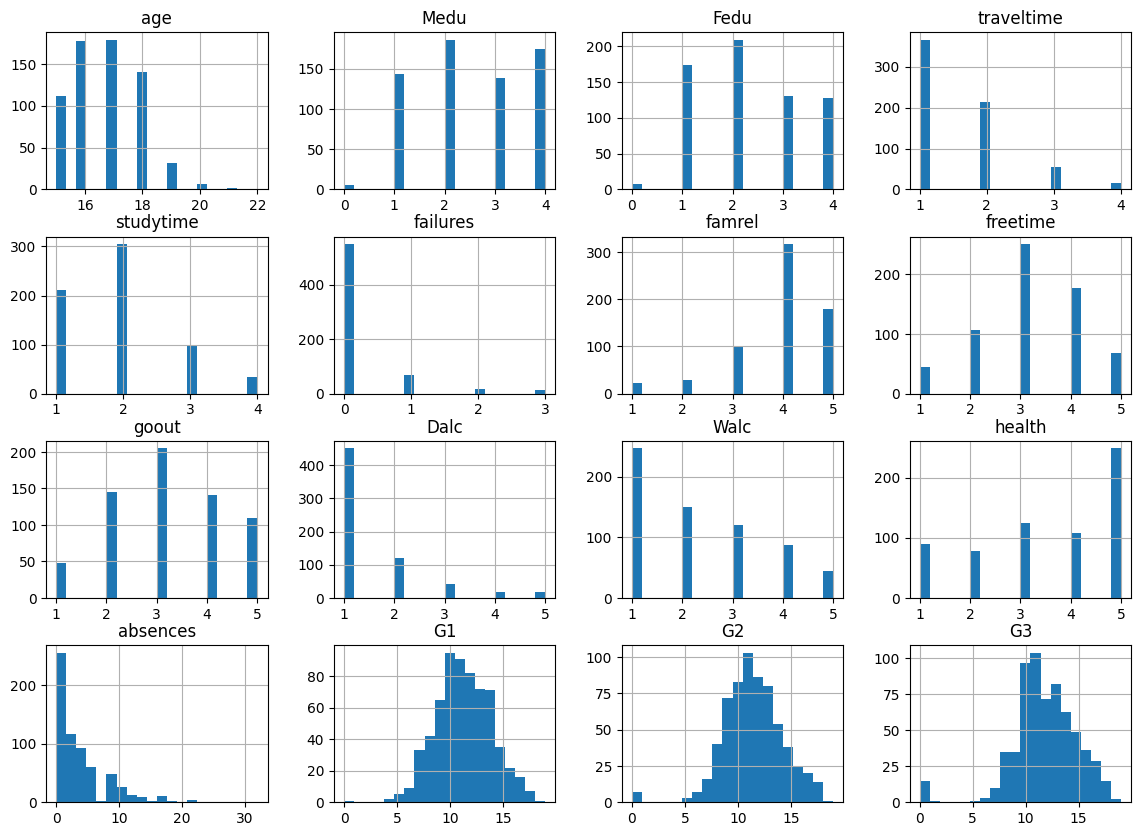

In [7]:
df.hist(bins=20, figsize=(14, 10))
plt.show()

***

Нулевая гипотеза H0: Средние итоговые оценки студентов (G3) НЕ отличаются в зависимости от пола.   
Альтернативная гипотеза H1: Средние итоговые оценки студентов (G3) отличаются в зависимости от пола.

Применим двухвыборочный независимый t-тест, alpha = 0.05

In [8]:
Male_scores = df[df['sex'] == 'M']['G3']
Female_scores = df[df['sex'] == 'F']['G3']

t_stat, p_value = stats.ttest_ind(Male_scores, Female_scores)
print(f't-statisic: {t_stat:.3f}, p-value: {p_value:.3f}')

t-statisic: -3.311, p-value: 0.001


Поскольку p-value < 0.05, мы должны принять альтернативную гипотезу (H1).  
__Средние итоговые оценки студетов (G3) отличаются в зависимости от пола.__

Средняя итоговая оценка
sex
F    12.253264
M    11.406015
Name: G3, dtype: float64


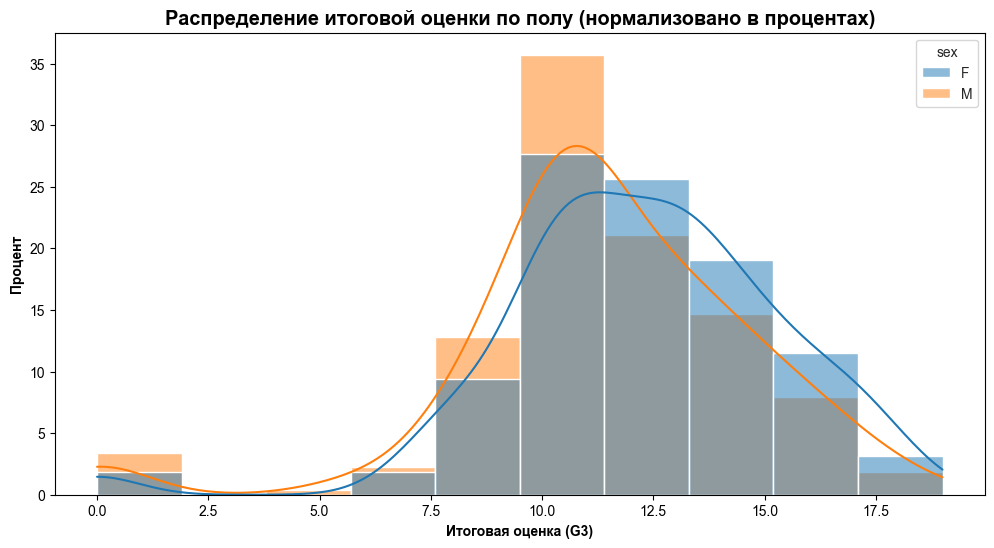

In [9]:
data = df.groupby('sex')['G3'].mean()
print('Средняя итоговая оценка', data, sep='\n')

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style('whitegrid')

sns.histplot(ax=ax, data=df, x='G3', kde=True, bins=10, hue='sex', stat='percent', common_norm=False)

ax.set_ylabel('Процент', fontweight='bold')
ax.set_xlabel('Итоговая оценка (G3)', fontweight='bold')
ax.set_title('Распределение итоговой оценки по полу (нормализовано в процентах)', fontweight='heavy', fontsize='x-large')

plt.show()

***

Нулевая гипотеза H0: Средние итоговые оценки студентов (G3) НЕ отличаются в зависимости от времени, потраченного на учебу (studytime)   
Альтернативная гипотеза H1: Средние итоговые оценки студентов (G3) отличаются в зависимости от времени, потраченного на учебу (studytime)

Применим однофакторный ANOVA test, alpha = 0.05

In [10]:

studytime = []
for x in df['studytime'].unique():
    studytime.append(df[df['studytime'] == x]['G3'])

f_stat, p_value = stats.f_oneway(*studytime)
print(f'ANOVA: F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}')

ANOVA: F-statistic: 15.876, P-value: 0.000


Поскольку p-value < 0.05, мы должны принять альтернативную гипотезу (H1).  
__Средние итоговые оценки студетов (G3) отличаются в зависимости от времени, потраченного на учебу.__

Проведем тест Тьюки для попарного сравнения среднего значения итоговой оценки студентов (G3) в зависимости от времени обучени (studytime)

studytime:   1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.2475,0.0001,0.5278,1.9672,True
1,3,2.3825,0.0,1.3958,3.3691,True
1,4,2.2128,0.0007,0.7443,3.6813,True
2,3,1.135,0.0103,0.1968,2.0732,True
2,4,0.9653,0.3084,-0.4711,2.4018,False
3,4,-0.1697,0.9927,-1.7567,1.4174,False


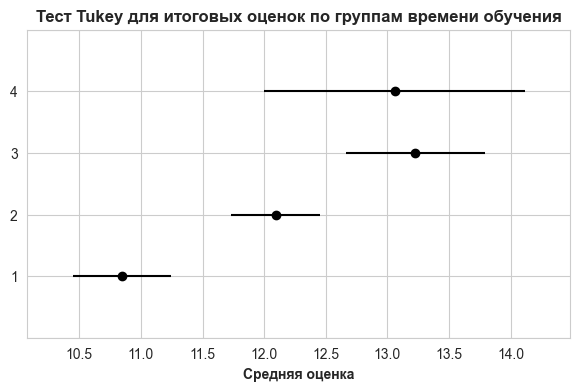

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(alpha=0.05, endog=df['G3'], groups=df['studytime'])


tukey.plot_simultaneous(figsize=(7, 4))
plt.xlabel('Средняя оценка', fontweight='bold')
plt.title("Тест Tukey для итоговых оценок по группам времени обучения", fontweight='heavy')
tukey.summary()

**Время, потраченное на обучние, оказывает значительное влияние на успеваемость, особенно для тех, кто учится менее 2 часов. Однако после этого порога дальнейшее увеличение времени обучения оказывает меньшее влияние на успеваемость.**

***

Проверка зависимости между романтическими отношениями и употреблением алкоголя
Для исследования зависимости между романтическими отношениями студентов и их привычками употребления алкоголя были проведены два Chi-Square теста:
1. Романтические отношения и употребление алкоголя в будние дни (Dalc)   
Гипотеза: существует зависимость между наличием романтических отношений и уровнем потребления алкоголя в будние дни.

2. Романтические отношения и употребление алкоголя в будние дни (Walc)  
Гипотеза: существует зависимость между наличием романтических отношений и уровнем потребления алкоголя в выходные дни.

Применим тест Chi-Square на независимость, alpha = 0.05

In [12]:
crosstab_dalc = pd.crosstab(df['romantic'], df['Dalc'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab_dalc)
print(f'X^2-statistic: {chi2_stat:.3f}, P-value: {p_value:.3f}')
print(crosstab_dalc)
print(expected, '-'*80, sep='\n')

crosstab_walc = pd.crosstab(df['romantic'], df['Walc'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab_walc)
print(f'X^2-statistic: {chi2_stat:.3f}, P-value: {p_value:.3f}')
print(crosstab_walc)
print(expected, '-'*80, sep='\n')

X^2-statistic: 9.642, P-value: 0.047
Dalc        1   2   3   4   5
romantic                     
no        289  75  32   7   7
yes       162  46  11  10  10
[[284.91525424  76.44067797  27.16486903  10.73959938  10.73959938]
 [166.08474576  44.55932203  15.83513097   6.26040062   6.26040062]]
--------------------------------------------------------------------------------
X^2-statistic: 1.635, P-value: 0.802
Walc        1   2   3   4   5
romantic                     
no        153  95  75  60  27
yes        94  55  45  27  18
[[156.04006163  94.76117103  75.80893683  54.9614792   28.42835131]
 [ 90.95993837  55.23882897  44.19106317  32.0385208   16.57164869]]
--------------------------------------------------------------------------------


1. Поскольку p < 0.05 мы отвергаем нулевую гипотезу и принимаем альтернативную.   
__Это означает, что существует статистически значимая зависимость между романтическими отношениями и потреблением алкоголя в будние.__

2. Поскольку p > 0.05 мы НЕ отвергаем нулевую гипотезу.   
__Это означает, что статистически значимой зависимости между романтическими отношениями и потреблением алкоголя в выходные дни нет.__


### Обсуждение
Интересное наблюдение заключается в том, что наличие романтических отношений связано с уровнем употребления алкоголя в будние дни, но не в выходные. Это может говорить о том, что студенты, состоящие в отношениях, возможно, предпочитают проводить будние дни в более расслабленной обстановке и чаще употребляют алкоголь по сравнению с теми, кто не имеет романтического партнера. Однако в выходные дни эта зависимость исчезает, что может быть связано с тем, что вне зависимости от статуса отношений студенты предпочитают отдыхать и проводить время с друзьями в одинаковой степени.
***

## Заключение проекта
В ходе данного анализа был проведен статистический анализ на основе данных о студентах, их успеваемости, времени, потраченном на учебу, романтических отношениях и привычках употребления алкоголя. Основные выводы:

1. __Зависимость итоговых оценок от пола__:
   - По результатам t-теста было выявлено, что средние итоговые оценки (G3) студентов зависят от их пола. Студентки имеют средние оценки значительно выше по сравнению с юношами.

2. __Влияние времени на учебу на успеваемость__:
   - Однофакторный ANOVA тест показал, что студенты, которые уделяют больше времени учебе, имеют более высокие средние оценки. При этом студенты, которые учатся менее 2 часов, демонстрируют значительно более низкие результаты.

3. __Зависимость между романтическими отношениями и употреблением алкоголя__:
   - Было установлено, что существует значимая зависимость между романтическими отношениями и уровнем употребления алкоголя в будние дни, но в выходные дни такой зависимости не обнаружено. Это говорит о том, что студенты в отношениях, возможно, ведут более активный социальный образ жизни в будние дни, но на выходных эта разница сглаживается.